In [10]:
#夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．
#このファイルを用いて，以下の問に対応するプログラムを実装せよ．

#なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

#形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），
#品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．
#第4章の残りの問題では，ここで作ったプログラムを活用せよ．

f=open("neko-mecab.txt", "r")
keitaoso1 = []
for row in f:
    word_keitaiso = row.split("\t")
    if len(word_keitaiso) < 2:
        continue
    keitaiso = word_keitaiso[1].split(",")
    dic = { 'surface': word_keitaiso[0], 'base': keitaiso[6],
                'pos': keitaiso[0], 'pos1': keitaiso[1]}
    keitaoso1.append(dic)
keitaoso1

[{'base': '一', 'pos': '名詞', 'pos1': '数', 'surface': '一'},
 {'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
 {'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩'},
 {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
 {'base': '猫', 'pos': '名詞', 'pos1': '一般', 'surface': '猫'},
 {'base': 'だ', 'pos': '助動詞', 'pos1': '*', 'surface': 'で'},
 {'base': 'ある', 'pos': '助動詞', 'pos1': '*', 'surface': 'ある'},
 {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'},
 {'base': '名前', 'pos': '名詞', 'pos1': '一般', 'surface': '名前'},
 {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
 {'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続', 'surface': 'まだ'},
 {'base': '無い', 'pos': '形容詞', 'pos1': '自立', 'surface': '無い'},
 {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'},
 {'base': '\u3000', 'pos': '記号', 'pos1': '空白', 'surface': '\u3000'},
 {'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞', 'surface': 'どこ'},
 {'base': 'で', 'pos': '助詞', 'pos1': '格助詞', 'surface': 'で'},
 {'base': '生れる',

In [14]:
#31. 動詞
#動詞の表層形をすべて抽出せよ．

for row in keitaoso1:
    if row['pos'] == '動詞':
        print(row['surface'])
        break

生れ


In [18]:
#32. 動詞の原形
#動詞の原形をすべて抽出せよ
count = 0
for  row in keitaoso1:
    if row['pos'] == '動詞':
        print(row['base'])
        count = count+1
        if count > 5:
            break

生れる
つく
する
泣く
する
いる


In [19]:
#33. サ変名詞
#çの名詞をすべて抽出せよ

In [22]:
#34. 「AのB」
#2つの名詞が「の」で連結されている名詞句を抽出せよ．

count = 0
for i in range(len(keitaoso1) - 2):
    if keitaoso1[i]['pos'] == '名詞' and keitaoso1[i+1]['surface'] == 'の' and keitaoso1[i+2]['pos'] == '名詞':
        print(keitaoso1[i]['surface'] + keitaoso1[i+1]['surface'] + keitaoso1[i+2]['surface'])
        count += 1
        if count > 5:
            break

彼の掌
掌の上
書生の顔
はずの顔
顔の真中
穴の中


In [32]:
#35. 名詞の連接
#名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．
ret = []
temp = []
for row in keitaoso1:
    if row['pos'] == '名詞':
        temp.append(row)
    else:
        if len(temp) > 1:
            ret.append(temp)
            temp = []
if len(temp) > 1:
    ret.append(temp)
    
count = 0
for row in ret:
    a=""
    for word in row:
        a += word['surface']
    print(a)
    count += 1
    if count > 5:
        break

一吾輩
猫名前
どこ見当
何所
ニャーニャーいた事
記憶吾輩


In [35]:
#36. 単語の出現頻度
#文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

from collections import Counter

counter = Counter()
for row in keitaoso1:
    if row['pos'] == '名詞':
        counter[row['surface']] += 1
a=0
for word, cnt in counter.most_common():
    print( word, cnt)
    a += 1
    if a > 5:
        break

の 1611
事 1207
もの 981
君 973
主人 932
ん 704


(array([ 3.,  2.,  0.,  1.,  2.,  0.,  1.,  0.,  0.,  1.]),
 array([  539. ,   646.2,   753.4,   860.6,   967.8,  1075. ,  1182.2,
         1289.4,  1396.6,  1503.8,  1611. ]),
 <a list of 10 Patch objects>)

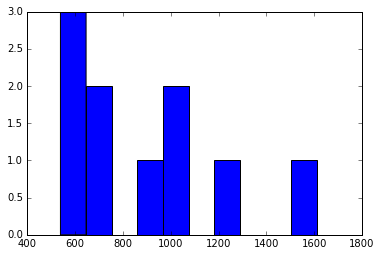

In [64]:
#37. 頻度上位10語
#出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

counter = Counter()
for row in keitaoso1:
    if row['pos'] == '名詞':
        counter[row['surface']] += 1

x=[]
y=[]
for word,cnt in counter.most_common(10):
    x.append(word)
    y.append(cnt)

#plt.hist(counter.most_common(10))
x = np.random.normal(50, 10, 1000)
#y
plt.hist(y)

In [52]:
#38. ヒストグラム
#単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．